# Special Series Solutions

In [1]:
%matplotlib inline
from sympy import *
init_printing()

In [2]:
x, t = symbols('x, t')

SymPy can compute special series like formal power series and fourier series. This is a new feature released in SymPy 1.0

Let's try computing formal power series of some basic functions.

In [3]:
exp_series = fps(exp(x), x)
exp_series

This looks very similar to what ``series`` has to offer, but unlike series a formal power series object returns an infinite expansion.

In [4]:
exp_series.infinite # Infinite representation

  ∞                              
______                           
╲                                
 ╲     ⎧ k                       
  ╲    ⎪x                        
   ╲   ⎪──  for Mod(k, 1) = 0    
    ╲  ⎨k!                       
    ╱  ⎪                      + 1
   ╱   ⎪0       otherwise        
  ╱    ⎩                         
 ╱                               
╱                                
‾‾‾‾‾‾                           
k = 1                            

We can easily find out any term of the expansion (no need to recompute the expansion).

In [5]:
exp_series.term(51) # equivalent to exp_series[51]

In [6]:
exp_series.truncate(10) # return a truncated series expansion

# Exercise

Try computing the formal power series of $\log(1 + x)$. Try to look at the infinite representation. What is the 51st term in this case? Compute the expansion about 1.

In [7]:
log_series = fps(log(1 + x), x)
log_series

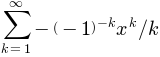

In [8]:
# infinite representation
log_series.infinite

In [9]:
# 51st term
log_series.term(51)

In [10]:
# expansion about 1
fps(log(1 + x), x, x0=1)

# Fourier Series

Fourier series for functions can be computed using ``fourier_series`` function.

A sawtooth wave is defined as:
   1. $$ s(x) = x/\pi \in (-\pi, \pi) $$
   2. $$ s(x + 2k\pi) = s(x) \in (-\infty, \infty) $$
    
Let's compute the fourier series of the above defined wave.

In [11]:
sawtooth_series = fourier_series(x / pi, (x, -pi, pi))
sawtooth_series

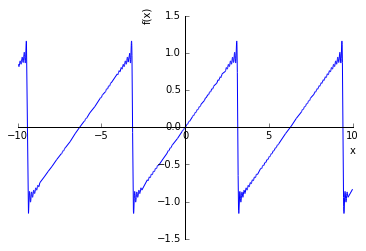

In [12]:
plot(sawtooth_series.truncate(50)) 

See https://en.wikipedia.org/wiki/Gibbs_phenomenon for why the fourier series has peculiar behavior near jump discontinuties.

Just like formal power series we can index fourier series as well.

In [13]:
sawtooth_series[51]

It is easy to shift and scale the series using ``shift`` and ``scale`` methods.

In [14]:
sawtooth_series.shift(10).truncate(5)

In [15]:
sawtooth_series.scale(10).truncate(5)

# Exercise

Consider a square wave defined over the range of (0, 1) as:
   1. $$ f(t) = 1 \in (0, 1/2] $$
   2. $$ f(t) = -1 \in (1/2, 1) $$
   3. $$ f(t + 1) = f(t) \in (-\infty, \infty) $$
    
Try computing the fourier series of the above defined function. Also, plot the computed fourier series.

In [16]:
square_wave = Piecewise((1, t <= Rational(1, 2)), (-1, t > Rational(1, 2)))

In [17]:
square_series = fourier_series(square_wave, (t, 0, 1))
square_series

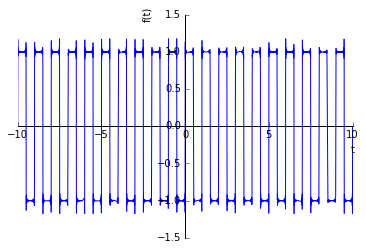

In [18]:
plot(square_series.truncate(50))

# What next?

Try some basic operations like addition, subtraction, etc on formal power series, fourier series and see what happens. 